In [3]:
# 데이터 파일을 가져오기 위해 구글 드라이브 마운트(코랩에서)
# from google.colab import drive

# 한글 폰트 설치와 설정

import platform
from matplotlib import font_manager, rc

#플랫폼 패키지는 현재 내 컴퓨터의 os가 무엇인지 코드로 확인하는 패키지
#맥과 윈도우에서 다 사용할 수 있는 코드
#윈도우용 코드만 가져다 써도됨
if platform.system() == 'Darwin':   #macOS
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':   #WINDOWS
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:   #LINUX
    print('Unknown system... sorry~~~~') 
    

import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') 

In [2]:
#경로가 길다면 
# import os
# dataPath = 'C:\Users\user\DataAnalysis\data_practice\weather\'
# csvPath = os.path.join(dataPath,'seoul.csv')

import pandas as pd

seoul = pd.read_csv('seoul.csv', encoding='cp949')
seoul2 = pd.read_csv('seoul2.csv', encoding='cp949')
seoul3 = pd.read_csv('seoul3.csv', encoding='cp949')

seoul.shape     #39926,5
seoul2.shape    #2323.6
seoul3.shape    #6,6

(6, 6)

In [4]:
# seoul,seoul2,seoul3파일을 하나로 합쳐야 하므로 빠진 컬럼은 채워주고 컬럼이름도 통일시킨다.

seoul.columns
seoul['지점명'] = '서울'
seoul

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),지점명
0,1907-10-01,108,13.5,7.9,20.7,서울
1,1907-10-02,108,16.2,7.9,22.0,서울
2,1907-10-03,108,16.2,13.1,21.3,서울
3,1907-10-04,108,16.5,11.2,22.0,서울
4,1907-10-05,108,17.6,10.9,25.4,서울
...,...,...,...,...,...,...
39921,2018-03-24,108,7.6,4.0,13.1,서울
39922,2018-03-25,108,9.6,4.6,16.9,서울
39923,2018-03-26,108,11.0,5.3,18.1,서울
39924,2018-03-27,108,13.3,7.7,20.0,서울


In [5]:
#컬럼순서바꾸기(이중 대괄호) - 정확히는 컬럼을 선택하는 것(선택된 컬럼만 원래 파일에 덮어쓰기)
seoul = seoul[['지점','지점명','날짜','평균기온(℃)', '최저기온(℃)', '최고기온(℃)']]
# seoul = seoul['지점','지점명','날짜','평균기온(℃)', '최저기온(℃)', '최고기온(℃)'] # X 

In [6]:
print(seoul)

seoul.to_csv('서울1파일 확인용.csv')

seoul.columns
seoul.rename(columns={'날짜':'일시'},inplace=True)

#컬럼명이 정확하게 잘 변경되었는지 한번 더 확인 및 변경
seoul.columns = ['지점','지점명','일시','평균기온(℃)', '최저기온(℃)', '최고기온(℃)']
seoul2.columns = ['지점','지점명','일시','평균기온(℃)', '최저기온(℃)', '최고기온(℃)']
seoul3.columns = ['지점','지점명','일시','평균기온(℃)', '최저기온(℃)', '최고기온(℃)']
seoul

        지점 지점명          날짜  평균기온(℃)  최저기온(℃)  최고기온(℃)
0      108  서울  1907-10-01     13.5      7.9     20.7
1      108  서울  1907-10-02     16.2      7.9     22.0
2      108  서울  1907-10-03     16.2     13.1     21.3
3      108  서울  1907-10-04     16.5     11.2     22.0
4      108  서울  1907-10-05     17.6     10.9     25.4
...    ...  ..         ...      ...      ...      ...
39921  108  서울  2018-03-24      7.6      4.0     13.1
39922  108  서울  2018-03-25      9.6      4.6     16.9
39923  108  서울  2018-03-26     11.0      5.3     18.1
39924  108  서울  2018-03-27     13.3      7.7     20.0
39925  108  서울  2018-03-28     14.0      9.4     19.0

[39926 rows x 6 columns]


,지점,지점명,일시,평균기온(℃),최저기온(℃),최고기온(℃)
0,108,서울,1907-10-01,13.5,7.9,20.7
1,108,서울,1907-10-02,16.2,7.9,22.0
2,108,서울,1907-10-03,16.2,13.1,21.3
3,108,서울,1907-10-04,16.5,11.2,22.0
4,108,서울,1907-10-05,17.6,10.9,25.4
...,...,...,...,...,...,...
39921,108,서울,2018-03-24,7.6,4.0,13.1
39922,108,서울,2018-03-25,9.6,4.6,16.9
39923,108,서울,2018-03-26,11.0,5.3,18.1
39924,108,서울,2018-03-27,13.3,7.7,20.0


In [7]:
#3개 파일 합치기
result_data = pd.concat([seoul,seoul2,seoul3],ignore_index=True)
print(result_data)
result_data.to_csv('날씨정보.csv')


        지점 지점명          일시  평균기온(℃)  최저기온(℃)  최고기온(℃)
0      108  서울  1907-10-01     13.5      7.9     20.7
1      108  서울  1907-10-02     16.2      7.9     22.0
2      108  서울  1907-10-03     16.2     13.1     21.3
3      108  서울  1907-10-04     16.5     11.2     22.0
4      108  서울  1907-10-05     17.6     10.9     25.4
...    ...  ..         ...      ...      ...      ...
42250  108  서울  2024-08-07     29.6     27.2     33.4
42251  108  서울  2024-08-08     28.5     26.9     31.6
42252  108  서울  2024-08-09     29.3     25.6     33.6
42253  108  서울  2024-08-10     30.0     26.4     33.6
42254  108  서울  2024-08-11     30.8     27.8     34.4

[42255 rows x 6 columns]


In [8]:
#일시를 'datetime'으로 변경한다.

result_data['일시'] = pd.to_datetime(result_data['일시'])
result_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42255 entries, 0 to 42254
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   지점       42255 non-null  int64         
 1   지점명      42255 non-null  object        
 2   일시       42255 non-null  datetime64[ns]
 3   평균기온(℃)  41499 non-null  float64       
 4   최저기온(℃)  41497 non-null  float64       
 5   최고기온(℃)  41497 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 1.9+ MB


In [9]:
result_data['연도'] = result_data['일시'].dt.year

In [10]:
result_data

,지점,지점명,일시,평균기온(℃),최저기온(℃),최고기온(℃),연도
0,108,서울,1907-10-01,13.5,7.9,20.7,1907
1,108,서울,1907-10-02,16.2,7.9,22.0,1907
2,108,서울,1907-10-03,16.2,13.1,21.3,1907
3,108,서울,1907-10-04,16.5,11.2,22.0,1907
4,108,서울,1907-10-05,17.6,10.9,25.4,1907
...,...,...,...,...,...,...,...
42250,108,서울,2024-08-07,29.6,27.2,33.4,2024
42251,108,서울,2024-08-08,28.5,26.9,31.6,2024
42252,108,서울,2024-08-09,29.3,25.6,33.6,2024
42253,108,서울,2024-08-10,30.0,26.4,33.6,2024


In [11]:
result_data['월'] = result_data['일시'].dt.month
result_data

,지점,지점명,일시,평균기온(℃),최저기온(℃),최고기온(℃),연도,월
0,108,서울,1907-10-01,13.5,7.9,20.7,1907,10
1,108,서울,1907-10-02,16.2,7.9,22.0,1907,10
2,108,서울,1907-10-03,16.2,13.1,21.3,1907,10
3,108,서울,1907-10-04,16.5,11.2,22.0,1907,10
4,108,서울,1907-10-05,17.6,10.9,25.4,1907,10
...,...,...,...,...,...,...,...,...
42250,108,서울,2024-08-07,29.6,27.2,33.4,2024,8
42251,108,서울,2024-08-08,28.5,26.9,31.6,2024,8
42252,108,서울,2024-08-09,29.3,25.6,33.6,2024,8
42253,108,서울,2024-08-10,30.0,26.4,33.6,2024,8


In [ ]:
# 1. 결측치가 있는 기간이 어떻게 되는가? 
# 2. 1907~2024 평균 기온이 상승하는가 상승한다면 얼마나 상승했는가
# 3. 그래프로 표현해보기(10년단위,20년단위 이런식으로)
# 4. 겨울의 최저기온, 여름의 최고기온은 언제인가

In [12]:
result_data.columns

Index(['지점', '지점명', '일시', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)', '연도', '월'], dtype='object')

In [ ]:
# 결측치가 있는 행 번호 리스트로 확인
# nullList = df[df.isnull().any(axis=1)].index.tolist()
# 평균기온은 있어도 다른곳에 결측치가 있으면 반환됨 

In [13]:
result_data[result_data['평균기온(℃)'].isnull()].index.tolist()
#평균기온 결측치 
#평균기온은 전쟁기간에만 누락됨


[15676,
 15677,
 15678,
 15679,
 15680,
 15681,
 15682,
 15683,
 15684,
 15685,
 15686,
 15687,
 15688,
 15689,
 15690,
 15691,
 15692,
 15693,
 15694,
 15695,
 15696,
 15697,
 15698,
 15699,
 15700,
 15701,
 15702,
 15703,
 15704,
 15705,
 15706,
 15707,
 15708,
 15709,
 15710,
 15711,
 15712,
 15713,
 15714,
 15715,
 15716,
 15717,
 15718,
 15719,
 15720,
 15721,
 15722,
 15723,
 15724,
 15725,
 15726,
 15727,
 15728,
 15729,
 15730,
 15731,
 15732,
 15733,
 15734,
 15735,
 15736,
 15737,
 15738,
 15739,
 15740,
 15741,
 15742,
 15743,
 15744,
 15745,
 15746,
 15747,
 15748,
 15749,
 15750,
 15751,
 15752,
 15753,
 15754,
 15755,
 15756,
 15757,
 15758,
 15759,
 15760,
 15761,
 15762,
 15763,
 15764,
 15765,
 15766,
 15767,
 15768,
 15769,
 15770,
 15771,
 15772,
 15773,
 15774,
 15775,
 15776,
 15777,
 15778,
 15779,
 15780,
 15781,
 15782,
 15783,
 15784,
 15785,
 15786,
 15787,
 15788,
 15789,
 15790,
 15791,
 15792,
 15793,
 15794,
 15795,
 15796,
 15797,
 15798,
 15799,
 15800,


In [14]:
result_data = result_data.drop(result_data.index[15676:16432])

In [15]:
result_data.reset_index(drop=True)

,지점,지점명,일시,평균기온(℃),최저기온(℃),최고기온(℃),연도,월
0,108,서울,1907-10-01,13.5,7.9,20.7,1907,10
1,108,서울,1907-10-02,16.2,7.9,22.0,1907,10
2,108,서울,1907-10-03,16.2,13.1,21.3,1907,10
3,108,서울,1907-10-04,16.5,11.2,22.0,1907,10
4,108,서울,1907-10-05,17.6,10.9,25.4,1907,10
...,...,...,...,...,...,...,...,...
41494,108,서울,2024-08-07,29.6,27.2,33.4,2024,8
41495,108,서울,2024-08-08,28.5,26.9,31.6,2024,8
41496,108,서울,2024-08-09,29.3,25.6,33.6,2024,8
41497,108,서울,2024-08-10,30.0,26.4,33.6,2024,8


In [32]:
# 연도별 count 갯수가 360개 미만인 연도는 삭제하여 이상치를 최대한 없도록 함
day_count = result_data.groupby('연도')['평균기온(℃)'].count()
print(day_count)
result_data= result_data[result_data['연도'].isin(day_count[day_count >= 365].index)]
result_data.reset_index(drop=True,inplace=True)
result_data

연도
1908    366
1909    365
1910    365
1911    365
1912    366
       ... 
2019    365
2020    366
2021    365
2022    365
2023    365
Name: 평균기온(℃), Length: 112, dtype: int64


,지점,지점명,일시,평균기온(℃),최저기온(℃),최고기온(℃),연도,월
0,108,서울,1908-01-01,-5.9,-9.1,-1.3,1908,1
1,108,서울,1908-01-02,-7.7,-13.9,-3.0,1908,1
2,108,서울,1908-01-03,-6.2,-10.8,-2.9,1908,1
3,108,서울,1908-01-04,-7.5,-12.8,-1.7,1908,1
4,108,서울,1908-01-05,-4.8,-11.3,-0.1,1908,1
...,...,...,...,...,...,...,...,...
40903,108,서울,2023-12-27,1.5,-2.8,6.8,2023,12
40904,108,서울,2023-12-28,1.2,-1.7,4.4,2023,12
40905,108,서울,2023-12-29,1.3,-1.5,4.6,2023,12
40906,108,서울,2023-12-30,0.6,-0.9,2.1,2023,12


In [ ]:
start_year = 1907
end_year = 2025
monthAvg =[]
index = []



In [67]:
#연평균 구해보기 

year_avg = result_data.groupby('연도')['평균기온(℃)'].mean()
print(year_avg)

index = year_avg.index

year_avg.info()


연도
1908    10.427322
1909    10.608767
1910    10.412055
1911    10.654795
1912    10.123770
          ...    
2019    13.598904
2020    13.271858
2021    13.752055
2022    13.296164
2023    14.109041
Name: 평균기온(℃), Length: 112, dtype: float64
<class 'pandas.core.series.Series'>
Index: 112 entries, 1908 to 2023
Series name: 평균기온(℃)
Non-Null Count  Dtype  
--------------  -----  
112 non-null    float64
dtypes: float64(1)
memory usage: 1.3 KB


In [ ]:
# start_year = 1907
# end_year = 2025
# monthAvg =[]
# index = []

# for year in range(start_year,end_year):
#     avg = []
#     if year%4 == 0:
#         oneYear = 366
#     else:
#         oneYear = 365

#     year_df = result_data[result_data['연도']==year]
#     if year_df.shape[0] < oneYear:
#         delList = result_data[result_data['연도']==year].index
#         result_data.drop(delList, inplace=True)
#     else:
#         index.append(year)
#         for month in range(1,13):
#             avg.append(year_df[year_df['월']==month]['평균기온(℃)'].mean())
#         monthAvg.append(avg)
#         print("{}:{}".format(year,year_df.shape[0]))

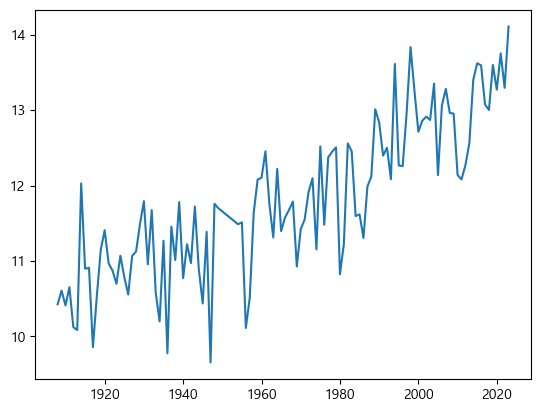

In [63]:
import matplotlib.pyplot as plt
plt.plot(index,year_avg.values)

In [62]:
yearAvg_df = pd.DataFrame(year_avg.values, index=index, columns=['연평균기온'])
yearAvg_df.head()

,연평균기온
연도,
1908,10.427322
1909,10.608767
1910,10.412055
1911,10.654795
1912,10.123770


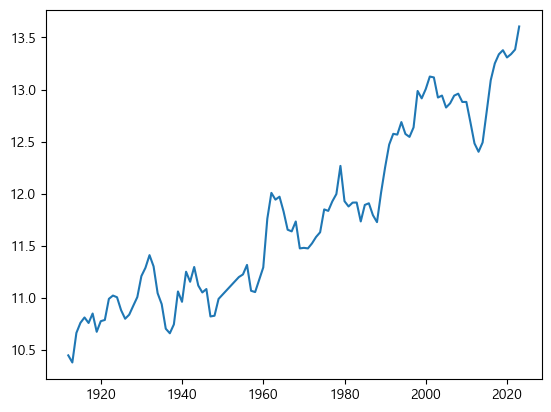

In [65]:
#rolling 
#데이터프레임의 시계열 데이터를 처리하거나 데이터의 이동 통계량을 계산

yearAvg_df['5년이동평균기온'] = yearAvg_df['연평균기온'].rolling(5).mean()
plt.plot(index,yearAvg_df['5년이동평균기온'])

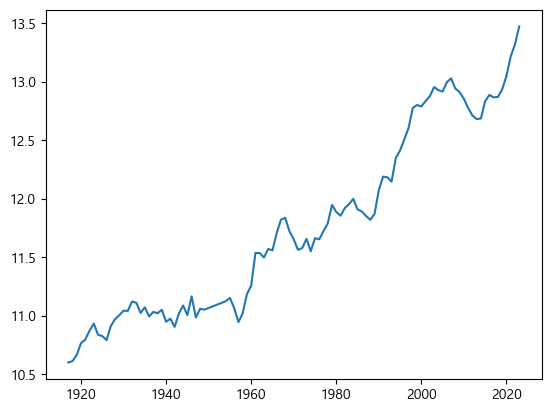

In [66]:
yearAvg_df['10년이동평균기온'] = yearAvg_df['연평균기온'].rolling(10).mean()
plt.plot(index,yearAvg_df['10년이동평균기온'])